In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
X, y = data[:, :-1], data[:, -1].reshape(-1, 1)

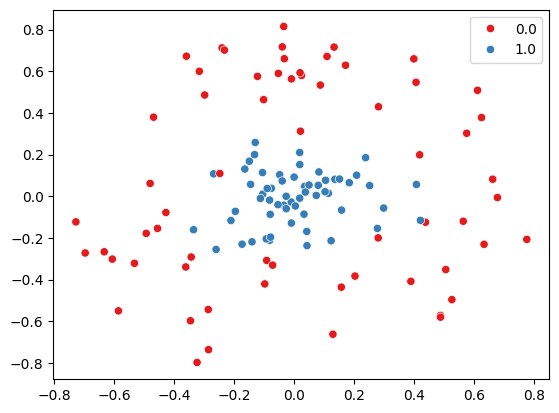

In [3]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten(), palette='Set1')
plt.show()

In [4]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# Define the loss function with regularization
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    los = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)
    return los

In [6]:
# Define the gradient of the loss function
def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (h - y)) / len(y)
    return grad

In [7]:
# The feature transformation function
def expand_feature(x1, x2, power = 2):
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1 ** (i - j) * x2 ** j).reshape(-1, 1), axis=1)
    return new_x

In [8]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) >= 0.5).flatten()

In [9]:
# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    n = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * (np.dot(X.T, (h - y)) / n)
        cost = loss(theta, X, y)
        costs.append(cost)
    return theta, costs

In [10]:
# Define logistic regression with feature expansion
def logistic_regression(X, y, power=2, alpha=0.01, iterations=100):
    X_expanded = expand_feature(X[:, 0], X[:, 1], power)
    theta = np.zeros((X_expanded.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent(X_expanded, y, theta, alpha, iterations)
    predictions = predict(theta, X_expanded)
    return predictions, theta, costs

In [71]:
# Decide hyperparameters
power = 20
num_iterations = 20000
alpha = 0.6

# Train the model
predictions, theta, costs = logistic_regression(X, y, power, alpha, num_iterations)

In [72]:
# Print results
print("The accuracy of the model is {:.2f}%".format(sum(predictions == y.flatten()) / len(y) * 100))

The accuracy of the model is 95.08%


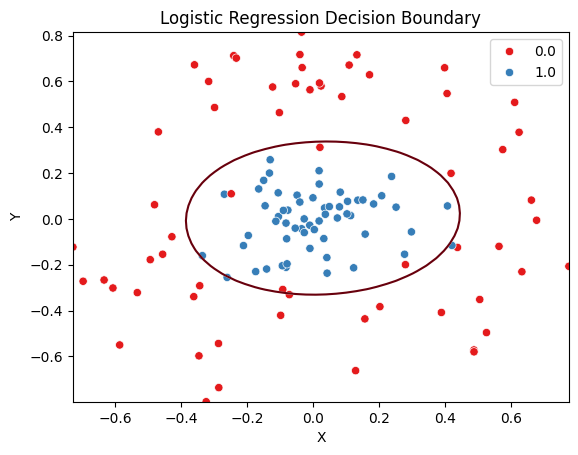

In [74]:
# Visualize the classifier

u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta).item()

z = np.transpose(z)

plt.contour(u, v, z, [0, 0.01], cmap= 'Reds')
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten(), palette='Set1')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Regularization

In [14]:
# Cost function ( AKA loss function ) with regularization
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta_reg = np.copy(theta)
    theta_reg[0] = 0
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y) + lam * np.sum(theta_reg * theta_reg) / len(y)
    return cos


In [15]:
# Gradient function with regularization
def gradient_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta_reg = np.copy(theta)
    theta_reg[0] = 0
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta_reg) / len(y)
    return grad

In [16]:
# Gradient descent with regularization
def gradient_descent_reg(X, y, theta, alpha, iterations=100, lam=0):
    n = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * ((np.dot(X.T, (h - y)) + 2 * lam * np.copy(theta)) / n)
        cost = cost_reg(theta, X, y, lam)
        costs.append(cost)
    return theta, costs

In [17]:
# Logistic regression with feature expansion and regularization
def logistic_regression_reg(X, y, power=2, alpha=0.01, iterations=100, lam=0): # 4 hyperparameters
    X_expanded = expand_feature(X[:, 0], X[:, 1], power)
    theta = np.zeros((X_expanded.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent_reg(X_expanded, y, theta, alpha, iterations, lam)
    predictions = predict(theta, X_expanded)
    return predictions, theta, costs

In [ ]:
# Decide hyperparameters
power = 15 # reduced power to avoid overfitting
num_iterations = 48 # optimized number of iterations. Below 48, accuracy starts to drop
alpha = 0.6
lam = 7 # above 7, accuracy starts to drop

# Train the model
predictions_reg, theta_reg, costs_reg = logistic_regression_reg(X, y, power, alpha, num_iterations, lam)

In [67]:
# Print results
print("The accuracy of the model is {:.2f}%".format(sum(predictions_reg == y.flatten()) / len(y) * 100))

The accuracy of the model is 90.98%


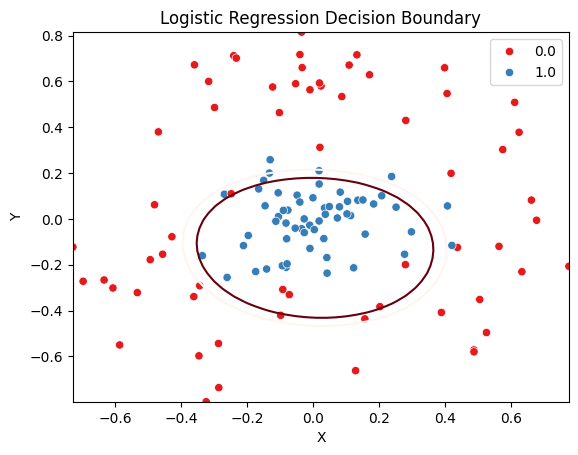

In [68]:
# Visualize the classifier

u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta_reg).item()

z = np.transpose(z)

plt.contour(u, v, z, [0, 0.01], cmap= 'Reds')
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten(), palette='Set1')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()